<a href="https://colab.research.google.com/github/marcinwolter/MachineLearning-KISD-2024/blob/main/lecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

#  
# **<font color = "red">Introduction to machine learning</font>**
## Lecture 4

## **<font color = "green">Neural Networks</font>**

*27 March 2024*


---

*Marcin Wolter, IFJ PAN*

*e-mail: marcin.wolter@ifj.edu.pl*


---
</center>

#<font color='green'>**Program for today:**


* <font color='red'> Deep Neural Networks - a tutorial</font>
* <font color='red'> Convolutional Neural Networks - how to work with images?</font>

<br>


**As always all slides are here:**

*https://github.com/marcinwolter/MachineLearning-KISD-2024*


<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture5/Screenshot%20from%202022-03-20%2020-41-56.png' width=600px>





---

---





---



<center>

#<font color='green'> **NEURAL NETWORKS**

</center>



---



---



---

# <font color = green> **Deep Neural Networks**






#**Machine Learning and Deep Learning**

<span style="color:#000000"> __Traditional ML \(BDT\, NN etc\)__ </span>  <span style="color:#000000"> – the scientist finds good\, well discriminating variables </span>  <span style="color:#000000">\(~10\)\, called “features”\, and performs classification using them as inputs for the ML algorithm\.</span>

<span style="color:#000000"> __Deep Learning__ </span>  <span style="color:#000000"> – thousands or millions of input variables \(like pixels of a photo\)\, the features are </span>  <span style="color:#000000"> _automagically_ </span>  <span style="color:#000000"> extracted during training\.</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture6/MachineLearning2020_643.png' width=650px>





* **Traditional Neural Networks** have one or two hidden layers\.

* <span style="color:#000000"> __Deep Neural Network:__ </span>  <span style="color:#000000"> a stack of sequentially trained </span>  <span style="color:#000000"> __auto encoders__ </span>  <span style="color:#000000">\, which recognize different features \(more complicated in each layer\) and automatically prepare a new representation of data\. This is how our brains are organized\.</span>







#<span style="color:#800000"><font color = green> __A tutorial – how to design and train a Keras DNN__ </span>

<span style="color:#000000">Task – build a simple network to recognize hand\-written digits:</span>

* <span style="color:#000000">60000 train samples</span>

* <span style="color:#000000">10000 test samples</span>



#**Keras & Tensorflow**

##**About Keras**

https://keras.io/

Keras is a deep learning API written in Python, running on top of the machine learning platform **TensorFlow**. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research.

Keras is:

* **Simple** -- but not simplistic. Keras reduces developer cognitive load to free you to focus on the parts of the problem that really matter.
* **Flexible** -- Keras adopts the principle of progressive disclosure of complexity: simple workflows should be quick and easy, while arbitrarily advanced workflows should be possible via a clear path that builds upon what you've already learned.
* **Powerful** -- Keras provides industry-strength performance and scalability: it is used by organizations and companies including NASA, YouTube, or Waymo.

---

##**Keras & TensorFlow 2**

https://www.tensorflow.org/

TensorFlow 2 is an end-to-end, open-source machine learning platform. You can think of it as an infrastructure layer for differentiable programming. It combines four key abilities:

* Efficiently executing low-level tensor operations on CPU, GPU, or TPU.
* Computing the gradient of arbitrary differentiable expressions.
* Scaling computation to many devices, such as clusters of hundreds of GPUs.
*Exporting programs ("graphs") to external runtimes such as servers, browsers, mobile and embedded devices.

Keras is the high-level API of TensorFlow 2: an approachable, highly-productive interface for solving machine learning problems, with a focus on modern deep learning. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity.

Keras empowers engineers and researchers to take full advantage of the scalability and cross-platform capabilities of TensorFlow 2: you can run Keras on TPU or on large clusters of GPUs, and you can export your Keras models to run in the browser or on a mobile device.




##**Training data** 28 x 28 pixels:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture6/MachineLearning2020_647.png' width=450px>

---






<span style="color:#000000">The first step is to define the functions and classes we intend to use in this tutorial\. We will use the </span>  <span style="color:#000000">[NumPy library](https://www.numpy.org/)</span>  <span style="color:#000000"> to load our dataset and we will use two classes from the </span>  <span style="color:#000000">[Keras library](https://keras.io/)</span>  <span style="color:#000000"> to define our model\.</span>

<span style="color:#000000">The imports required are listed below\.</span>


In [ ]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

Define some parameters:

In [ ]:
batch_size = 128  # size of the training batch
num_classes = 10  # number of classes. There are 10 different digits
epochs = 20       # number of training epochs



<span style="color:#000000">We can now load our dataset</span>

<span style="color:#000000"> __MNIST database of handwritten digits__ </span>

<span style="color:#000000">Dataset of 60\,000 28x28 grayscale images of the 10 digits\, along with a test set of 10\,000 images\.</span>

<span style="color:#000000"> __Usage:__ </span>

<span style="color:#000000">from keras\.datasets import mnist</span>

*\(x\_train\, y\_train\)\, \(x\_test\,y\_test\) = mnist\.load\_data\(\)*

<span style="color:#000000">    </span>  <span style="color:#000000"> __Returns__ </span>  <span style="color:#000000">:</span>

<span style="color:#000000">        </span>  <span style="color:#000000">2 tuples:</span>

<span style="color:#000000">            </span>  <span style="color:#000000">**x\_train\, x\_test:** uint8 array of grayscale image data with shape \(num\_samples\, 28\, 28\)\.</span>

<span style="color:#000000">            </span>  <span style="color:#000000">**y\_train\, y\_test:** uint8 array of digit labels \(integers in range 0\-9\) with shape \(num\_samples\,\)\.</span>

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


We make now a numpy array of shape (6000, 784) out of a python tuple

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

Convert to float32

In [ ]:
# convert to float32

x_train = x_train.astype( 'float32' )
x_test = x_test.astype( 'float32' )

The value of each pixel is now between 0 and 255, we normalize it to the range (0,1)

In [ ]:
#normalize to one

x_train /= 255
x_test /= 255


<span style="color:#800000"> **Prepare data: </span>  <span style="color:#800000"> convert to categorical**

<span style="color:#000000">We want to use NN with 10 outputs \(each corresponding to one digit\) to get a probability for each digit\. So we convert the y\_train from a single number to vector:</span>

7 → \(0\,  0\, 0\, 0\, 0\, 0\,  1\, 0\, 0\)</span>

0 → \(1\,  0\, 0\, 0\, 0\, 0\, 0\, 0\, 0\)</span>

9 → \(0\,  0\, 0\, 0\, 0\, 0\,  0\, 0\, 1\)</span>



In [ ]:
# print info about a shape of arrays
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')
print(y_train.shape, 'train samples')
print(y_test.shape, 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test =  tf.keras.utils.to_categorical(y_test, num_classes)


# print info about a shape of arrays
print(x_train.shape, 'train samples after conversion')
print(x_test.shape, 'test samples  after conversion')
print(y_train.shape, 'train samples after conversion')
print(y_test.shape, 'test samples  after conversion')

(60000, 784) train samples
(10000, 784) test samples
(60000,) train samples
(10000,) test samples
(60000, 784) train samples after conversion
(10000, 784) test samples  after conversion
(60000, 10) train samples after conversion
(10000, 10) test samples  after conversion



<span style="color:#800000"> __Define Keras Model__ </span>

<span style="color:#000000">Models in Keras are defined as a sequence of layers\.</span>

<span style="color:#000000">We create a Sequential model and add layers one at a time until we are happy with our network architecture\.</span>

<span style="color:#000000">The first thing to get right is to ensure the input layer has the right number of input features\. This can be specified when creating the first layer with 512 nodes and with the input\_dim argument and setting it to 784 for the 784 input variables\.</span>

<code>
<span style="color:#000000">model = Sequential()</span>

<span style="color:#000000">model\.add\(Dense\(</span>  <span style="color:#09885A">512</span>  <span style="color:#000000">\, activation=</span>  <span style="color:#A31515">'relu'</span>  <span style="color:#000000">\, input\_shape=\(</span>  <span style="color:#09885A">784</span>  <span style="color:#000000">\,\)\)\)</span>
</code>

<span style="color:#000000">The activation function is relu </span>
<span style="color:#000000">\(Rectified Linear\):</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture6/MachineLearning2020_648.png' width=450px>

---


<span style="color:#000000"> __Adding next layers\. How do we know the number of layers and their types?__ </span>

<span style="color:#000000">This is a very hard question\. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation\. Generally\, you need a network large enough to capture the structure of the problem\.</span>

<span style="color:#000000">In this example\, we will use a fully\-connected network structure with three hidden layers\.</span>

<span style="color:#000000">Fully connected layers are defined using the Dense class\. We can specify the number of neurons or nodes in the layer as the first argument\, and specify the activation function using the activation argument\.</span>

<span style="color:#000000">We will use the rectified linear unit activation function referred to as ReLU on the first three layers:</span>

<code>
model = Sequential()<br>
model.add(Dense(512, activation='relu', input_shape=(784,)))<br>
model.add(Dense(512, activation='relu'))<br>
model.add(Dense(512, activation='relu'))<br>
</code>


Adding output layer with num\_classes=10 nodes and softmax  activation function\. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0\.5\.



<span style="color:#800000"> __Softmax activation function__ </span>

Softmax function\, a wonderful activation function that turns numbers aka logits into probabilities that sum to one\. Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes\. It’s also a core element used in deep learning classification tasks\.

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture6/MachineLearning2020_649.png' width=450px>
<br>


<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture6/MachineLearning2020_650.png' width=450px>

**Dropout**

Between the layers we add a Dropout layer to avoid overtraining.

Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time\, which helps prevent overfitting\.

[http://www\.jmlr\.org/papers/volume15/srivastava14a/srivastava14a\.pdf](http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)


At the end we call:

<code>
<span style="color:#000000">model.summary()</span>  <span style="color:#000000"> </span>
</code>

  <span style="color:#000000"> print the network structure</span>


In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               200960    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               65792     
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 10)               


<span style="color:#800000"> __Train the network__ </span>





In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])



When compiling\, we must specify some additional properties required when training the network\. Training a network means finding the best set of weights to map inputs to outputs in our dataset\.

* We must specify the loss function to use to evaluate a set of weights\, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training\.

* This loss is for a categorical classification problems and is defined in Keras as “ _categorical\_crossentropy_ “\. You can learn more about choosing loss functions based on your problem here:

> [https://machinelearningmastery\.com/how\-to\-choose\-loss\-functions\-when\-training\-deep\-learning\-neural\-networks/](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

We will define the optimizer as the efficient stochastic gradient descent algorithm “ _RMSprop_ “\. We could also use “adam”\, which is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems\.


#**A hint!!!**

Try using GPU - it makes DNN much faster!

In [ ]:

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.3193 - accuracy: 0.9020 - val_loss: 0.1206 - val_accuracy: 0.9628
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1368 - accuracy: 0.9581 - val_loss: 0.0963 - val_accuracy: 0.9697
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1040 - accuracy: 0.9694 - val_loss: 0.0881 - val_accuracy: 0.9733
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0836 - accuracy: 0.9750 - val_loss: 0.0732 - val_accuracy: 0.9774
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0746 - accuracy: 0.9783 - val_loss: 0.0728 - val_accuracy: 0.9787
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0649 - accuracy: 0.9811 - val_loss: 0.0831 - val_accuracy: 0.9760
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0580 - accuracy: 0.9823 - val_loss: 0.0725 - val_accuracy: 0.9797
Epoch 



We can train or fit our model on our loaded data by calling the fit\(\) function on the model\.
Training occurs over epochs and each epoch is split into batches\.

* **Epoch:** One pass through all of the rows in the training dataset\.

* **Batch:**  One or more samples considered by the model within an epoch before weights are updated\.

One epoch is comprised of one or more batches\, based on the chosen batch size and the model is fit for many epochs\.
For this problem\, we will run for a small number of epochs \(20\) and use a  batch size of 128\.

These configurations can be chosen experimentally by trial and error\. We want to train the model enough so that it learns a good \(or good enough\) mapping of rows of input data to the output classification\. The model will always have some error\, but the amount of error will level out after some point for a given model configuration\. This is called model convergence\.

---

<span style="color:#800000"> __Evaluate Keras Model__ </span>

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on another “test” dataset\.

You can evaluate your model on a dataset using the evaluate\(\) function\.

This will generate a prediction for each input and output pair and collect scores\, including the average loss and any metrics you have configured\, such as accuracy\.

The evaluate\(\) function will return a list with two values\. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset\.



In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy:', score[1])



313/313 [==============================] - 1s 3ms/step - loss: 0.0800 - accuracy: 0.9849
Test accuracy: 0.9848999977111816


#**Score:**

We got over 98.1% - 98.6% of good answers! Let's compare it with our previous MNIST classifiers:
* PCA + Naive Bayes - 94.8%
* Shallow neural network 97.7%





#<span style="color:#800000"> __Program with more features__ </span>


* <span style="color:#000000">Visualization of results</span>

* <span style="color:#000000">Plotting the Neural Network structure</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture6/MachineLearning2020_651.png' width=450px>


In [ ]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam

from keras.utils import plot_model
from IPython.display import Image

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train0), (x_test, y_test0) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train0, num_classes)
y_test = tf.keras.utils.to_categorical(y_test0, num_classes)



60000 train samples
10000 test samples


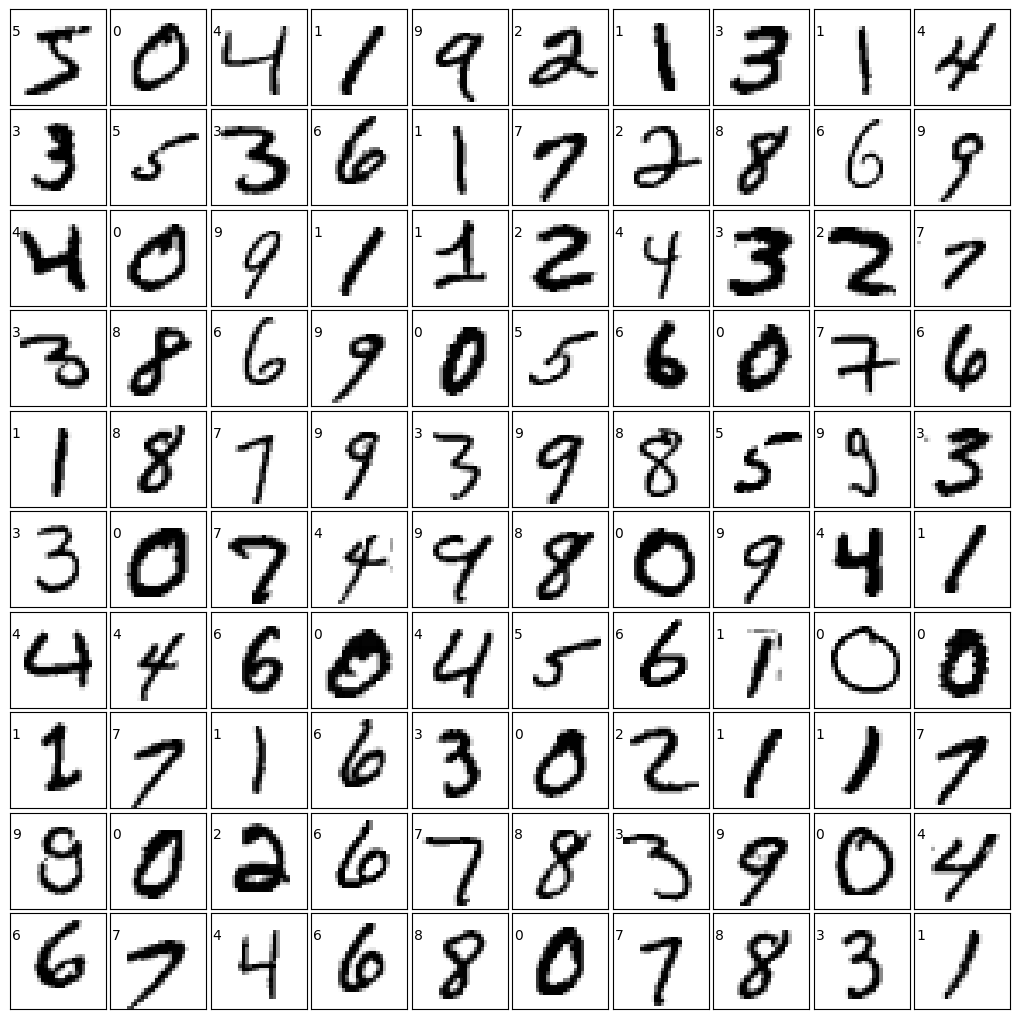

In [ ]:
#visualize the digits

fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train0[i]))

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 10)               

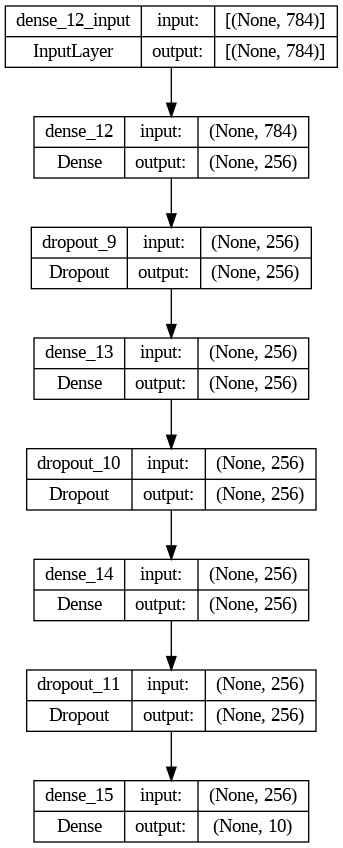

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Epoch 1/20
469/469 [==============================] - 8s 10ms/step - loss: 0.3186 - accuracy: 0.9026 - val_loss: 0.1268 - val_accuracy: 0.9613
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1328 - accuracy: 0.9600 - val_loss: 0.0873 - val_accuracy: 0.9734
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0978 - accuracy: 0.9706 - val_loss: 0.0787 - val_accuracy: 0.9750
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0798 - accuracy: 0.9750 - val_loss: 0.0712 - val_accuracy: 0.9791
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0694 - accuracy: 0.9786 - val_loss: 0.0785 - val_accuracy: 0.9769
Epoch 6/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0591 - accuracy: 0.9811 - val_loss: 0.0665 - val_accuracy: 0.9811
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0547 - accuracy: 0.9823 - val_loss: 0.0675 - val_accuracy: 0.9810
Epoch

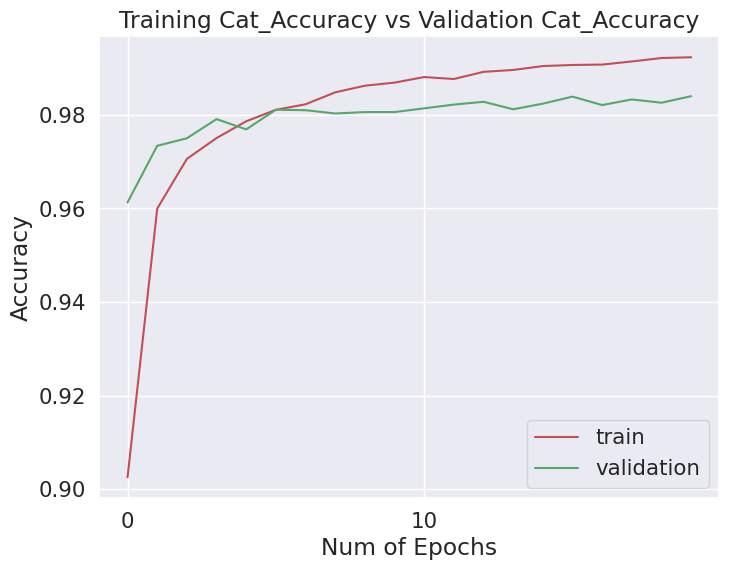

In [ ]:
# Plots for training and testing process: loss and accuracy

n_epochs = len(history.history['loss'])

plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Cat_Accuracy vs Validation Cat_Accuracy")
plt.legend(['train','validation'])



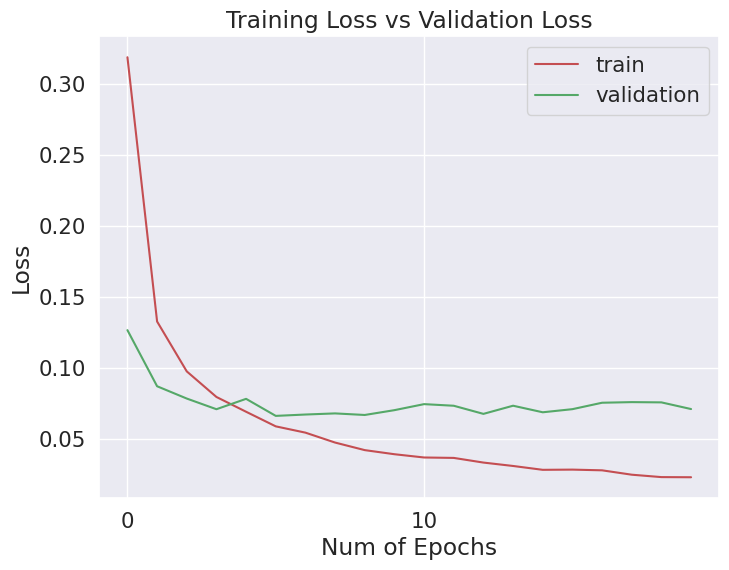

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()



In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07130534946918488
Test accuracy: 0.984000027179718


In [ ]:

# evaluate loaded model
scores_train = model.evaluate(x_train, y_train, verbose=0)
scores_test  = model.evaluate(x_test,  y_test,  verbose=0)

print("Accuracy Train: %.2f%% , Test: %.2f%% " % (scores_train[1]*100, scores_test[1]*100 ))

Accuracy Train: 99.82% , Test: 98.40% 


In [ ]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)

y_pred = np.argmax(Y_pred, axis=1)

y_test2 = np.argmax(y_test, axis=1)



#confusion matrix
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)



313/313 - 1s - 511ms/epoch - 2ms/step
[[ 970    1    1    0    0    0    4    2    1    1]
 [   0 1128    2    1    0    1    2    0    1    0]
 [   1    1 1017    1    2    0    1    7    2    0]
 [   1    0    5  992    0    2    0    3    5    2]
 [   0    0    2    0  972    0    3    1    0    4]
 [   2    0    0    9    1  863    9    1    7    0]
 [   4    2    1    0    3    1  946    0    1    0]
 [   0    5    6    0    0    0    0 1010    2    5]
 [   2    0    2    0    3    0    0    4  959    4]
 [   1    3    0    0   13    2    0    5    2  983]]


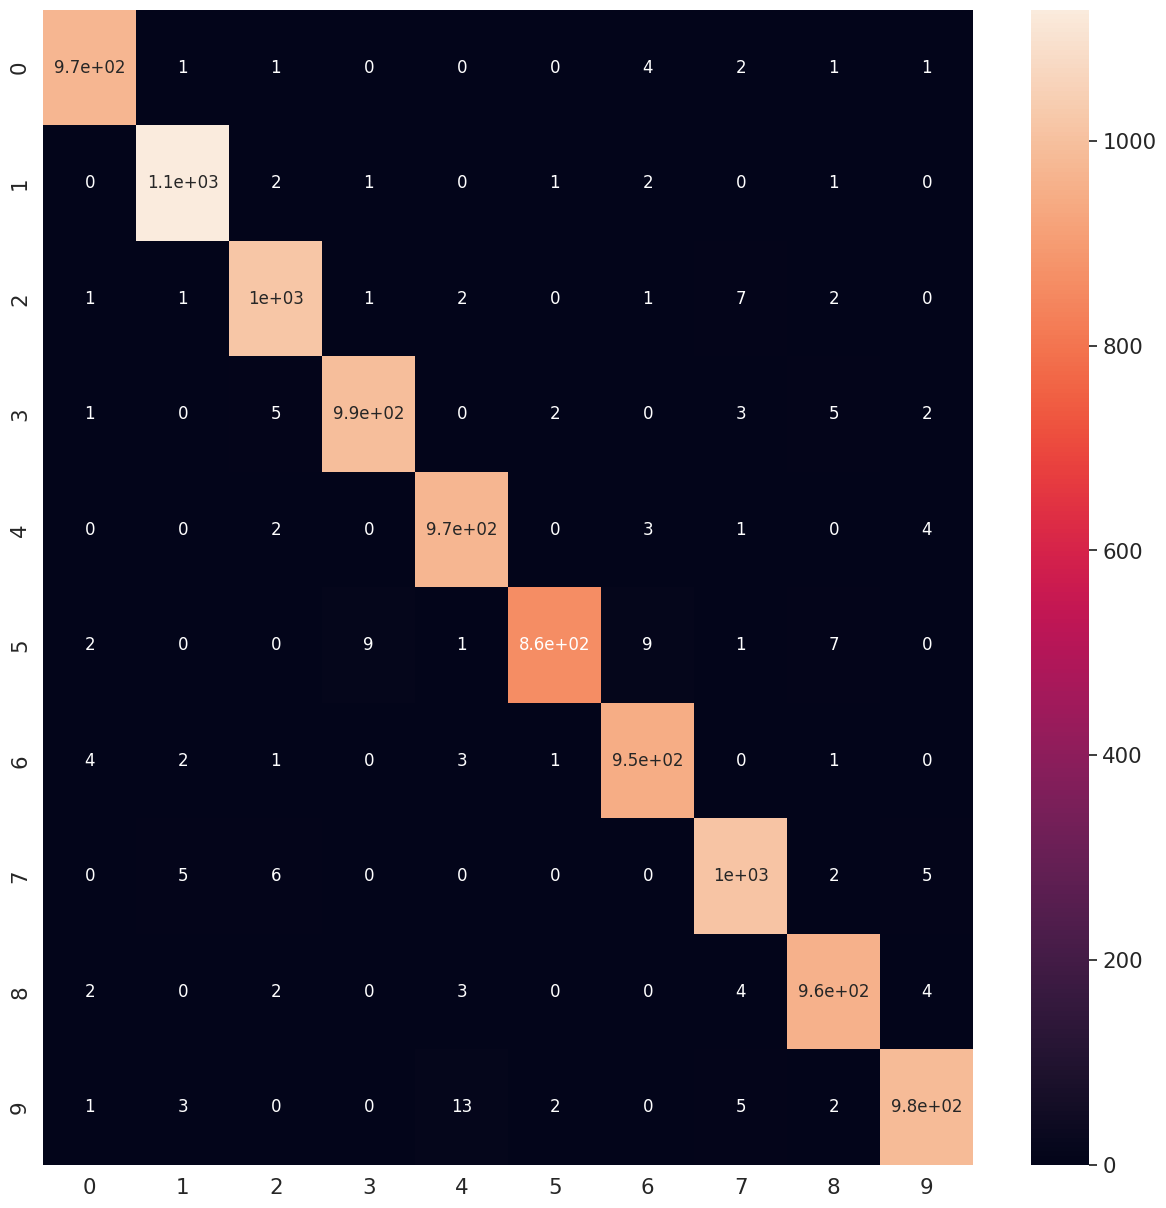

In [ ]:
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),range(10))
#                     range(num_classes),
#                  range(num_classes))
#plt.figure(figsize = (10,7))
plt.figure(2,figsize = (15,15) )
sn.set(font_scale=1.4) #for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()


313/313 [==============================] - 1s 2ms/step


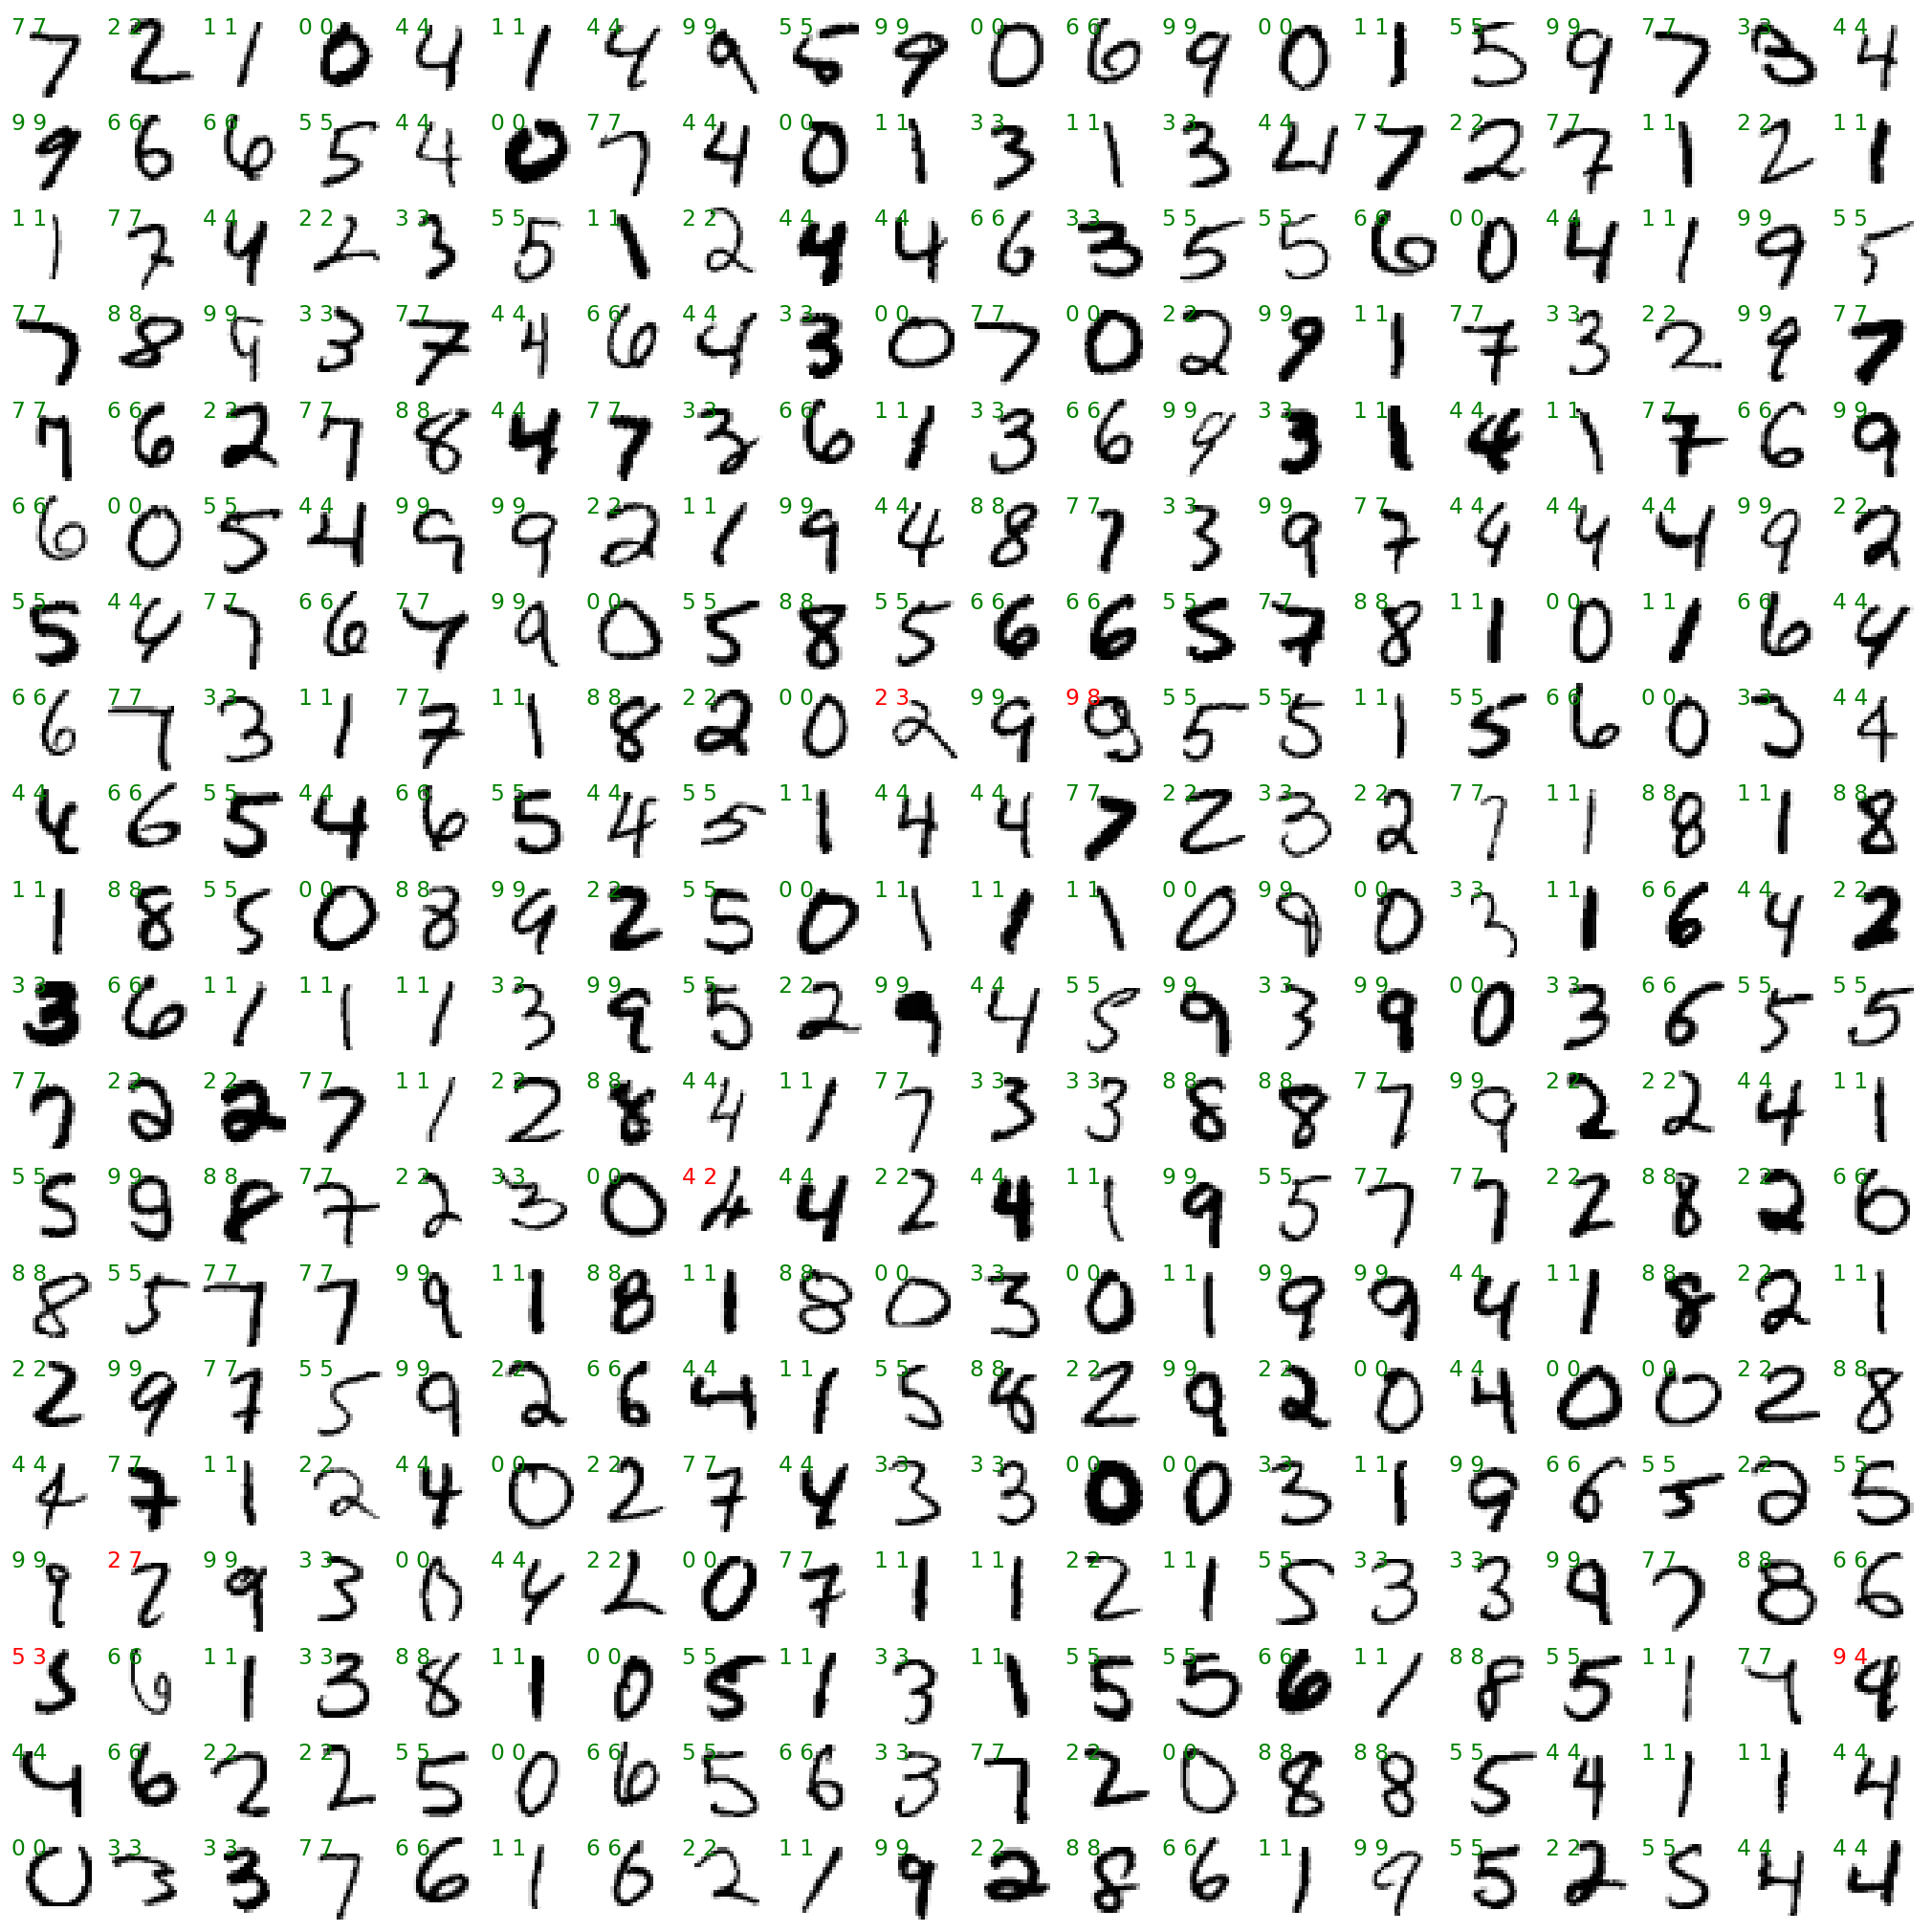

In [ ]:
# use the model to predict the labels of the test data
predicted = model.predict(x_test)
expected = y_test0



# Plot the prediction
fig = plt.figure(figsize=(20, 20))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
for i in range(400):
    ax = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if np.argmax(predicted[i]) == expected[i]:
        ax.text(0, 7, str(expected[i])+" "+str(np.argmax(predicted[i])), color='green')
    else:
        ax.text(0, 7, str(expected[i])+" "+str(np.argmax(predicted[i])), color='red')

# **Visualize the neural network**

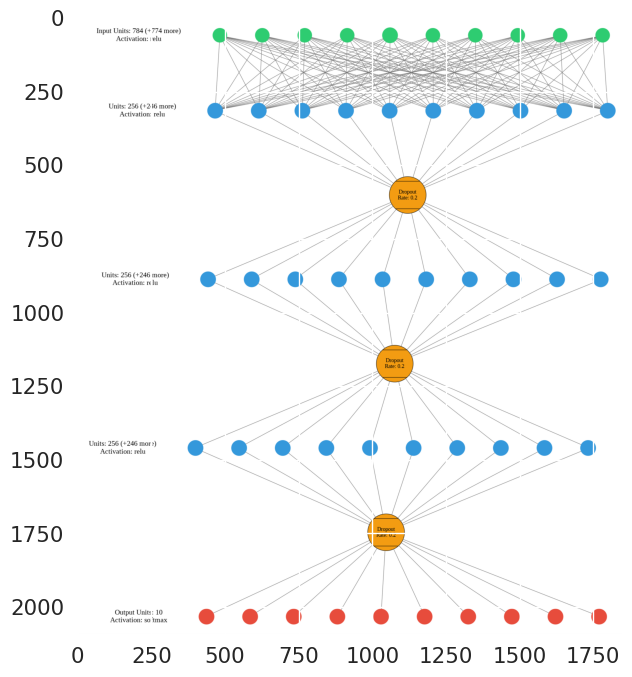

In [ ]:

# Creates the graph.png file

! pip3 install keras-visualizer
from keras_visualizer import visualizer

#create the graph.png image
visualizer(model=model, file_name='graph', file_format='png')

#show the graph
from matplotlib.pyplot import figure
import matplotlib.image as mpimg

figure(figsize=(12, 8))
img = mpimg.imread('graph.png')
imgplot = plt.imshow(img,)
plt.show()

#<font color=green> **Summary**

* we have learned about neural networks, and ...
* <span style="color:#000000"> __...we have built our very first Deep Neural Network\!\!\!__ </span>





---



---



---

